In [ ]:
import pandas as pd

df = pd.read_csv('data_all_teams.csv')

# # check at which age profession of all people is unemployed
# df = df[df['profession'] == 'unemployed']
# df = df.groupby('age').count()
# print(df)

# only take the rows with year 0
df = df[df['year'] == 0]

# drop the year column
df = df.drop(columns=['year'])

# drop the rows with child as profession
df = df[df['profession'] != 'child']

# drop the people with age older than 69
# convert age to int
df['age'] = df['age'].astype(int)
df = df[df['age'] <= 69]

print(df)

sex     profession   income  age
0     F  civil servant  5131.08   40
2     M     unemployed   124.10   25
3     M         farmer  1868.39   36
5     F  civil servant  5045.29   41
7     M      homemaker   149.64   30
..   ..            ...      ...  ...
494   M     unemployed   282.78   61
496   M         farmer  1320.54   24
497   M      homemaker   141.62   28
498   M         fisher  3088.21   61
499   M  civil servant  6683.06   55

[376 rows x 4 columns]

In [8]:
df = pd.read_csv('data_all_teams.csv')

# # check at which age profession of all people is unemployed
# df = df[df['profession'] == 'unemployed']
# df = df.groupby('age').count()
# print(df)

# only take the rows with year 0
df = df[df['year'] == 1]

# drop the year column
df = df.drop(columns=['year'])

# drop the rows with child as profession
df = df[df['profession'] != 'child']

# drop the people with age older than 69
# convert age to int
df['age'] = df['age'].astype(int)
df = df[df['age'] <= 69]

print(df)

    sex     profession   income  age
500   F  civil servant  4927.02   41
502   M     unemployed   130.71   26
503   M         farmer  1938.95   37
505   F  civil servant  5321.03   42
507   M      homemaker   156.78   31
..   ..            ...      ...  ...
994   M     unemployed   274.61   62
996   M         farmer  1468.96   25
997   M      homemaker   146.91   29
998   M         fisher  3200.20   62
999   M  civil servant  6804.97   56

[385 rows x 4 columns]


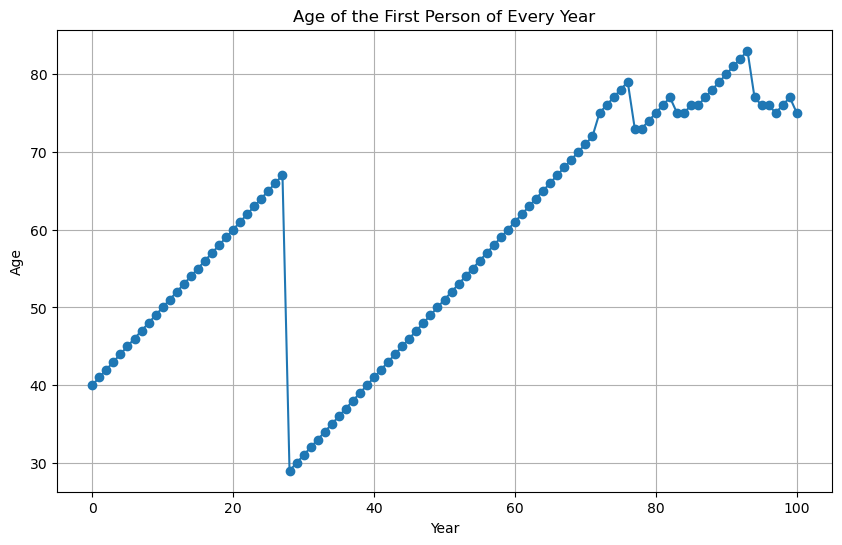

In [22]:
# Plot a graph of the first person of every year
import matplotlib.pyplot as plt

df = pd.read_csv('data_all_teams.csv')

# Get the first person of every year
first_person_per_year = df.groupby('year').first().reset_index()

# Plot the age of the first person of every year
plt.figure(figsize=(10, 6))
plt.plot(first_person_per_year['year'], first_person_per_year['age'], marker='o')
plt.xlabel('Year')
plt.ylabel('Age')
plt.title('Age of the First Person of Every Year')
plt.grid(True)
plt.show()

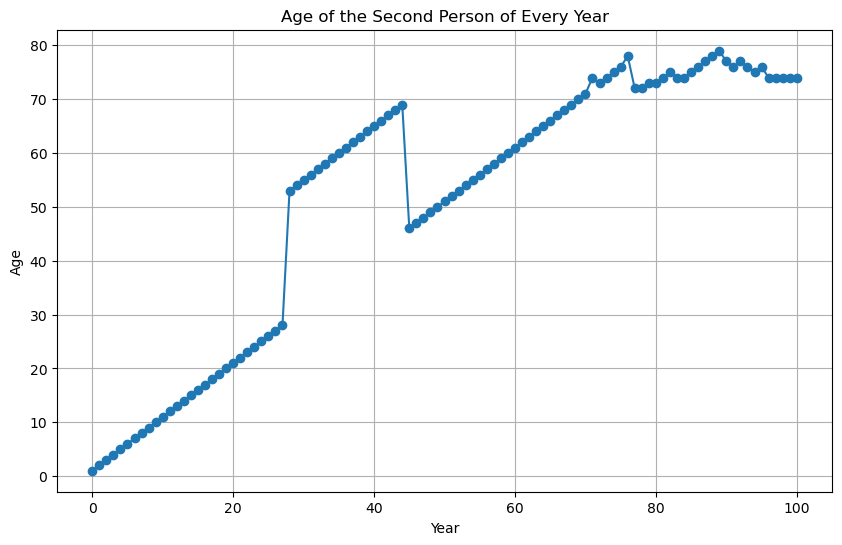

In [19]:
# Plot a graph of the first person of every year
import matplotlib.pyplot as plt

df = pd.read_csv('data_all_teams.csv')

# Get the first person of every year
# Get the second person of every year
second_person_per_year = df.groupby('year').nth(1).reset_index()

# Plot the age of the first person of every year
plt.figure(figsize=(10, 6))
plt.plot(second_person_per_year['year'], second_person_per_year['age'], marker='o')
plt.xlabel('Year')
plt.ylabel('Age')
plt.title('Age of the Second Person of Every Year')
plt.grid(True)
plt.show()

# Conclusion: When a person dies, the person beneath it moves upwards.

# A persons profession stays the same during his life (except for child and retired)

In [66]:
import pandas as pd

def assign_ids(df):
    # Sort the DataFrame by year to ensure consistent processing
    df = df.sort_values('year')
    
    # Initialize an empty dictionary to store person information
    person_dict = {}
    next_id = [1]  # Using a list to allow modification inside nested function

    def get_or_assign_id(row):
        year = row['year']
        sex = row['sex']
        ethnicity = row['ethnicity']
        age = row['age']
        
        # For year 0, assign new IDs to everyone
        if year == 0:
            new_id = next_id[0]
            person_dict[new_id] = {'sex': sex, 'ethnicity': ethnicity, 'birth_year': year - age}
            next_id[0] += 1
            return new_id
        
        # For subsequent years, try to match with existing people
        birth_year = year - age
        for person_id, info in person_dict.items():
            if (info['sex'] == sex and 
                info['ethnicity'] == ethnicity and 
                info['birth_year'] == birth_year):
                return person_id
        
        # If no match found, assign a new ID
        new_id = next_id[0]
        person_dict[new_id] = {'sex': sex, 'ethnicity': ethnicity, 'birth_year': birth_year}
        next_id[0] += 1
        return new_id

    # Apply the function to assign IDs
    df['id'] = df.apply(get_or_assign_id, axis=1)
    
    # Reorder columns to put ID first
    columns = ['id'] + [col for col in df.columns if col != 'id']
    df = df[columns]
    
    # Print the results
    print(df)
    print(f"\nProcessed {len(df)} rows and assigned {len(person_dict)} unique IDs.")
    
    return df

# Example usage
df = pd.read_csv('data_all_teams.csv')
result = assign_ids(df)


        id  year sex        profession    income  age  net_worth    ethnicity
0        1     0   F     civil servant   5131.08   40   10000.00    atlantean
341      2     0   M            farmer   2436.20   45   10000.00    atlantean
340      3     0   F  service provider   3095.50   22   10000.00     arcadian
339      4     0   M     civil servant   7701.95   62   10000.00     arcadian
338      5     0   M            farmer   1581.47   30   10000.00     arcadian
337      6     0   F             child      0.00   10   10000.00    atlantean
336      7     0   M            farmer   2329.57   42   10000.00     arcadian
335      8     0   F            fisher   1441.25   26   10000.00    atlantean
334      9     0   F            fisher   2417.73   46   10000.00     arcadian
333     10     0   M         homemaker    139.64   29   10000.00     arcadian
332     11     0   F         homemaker    168.95   34   10000.00     arcadian
331     12     0   M        unemployed    135.52   28   10000.00

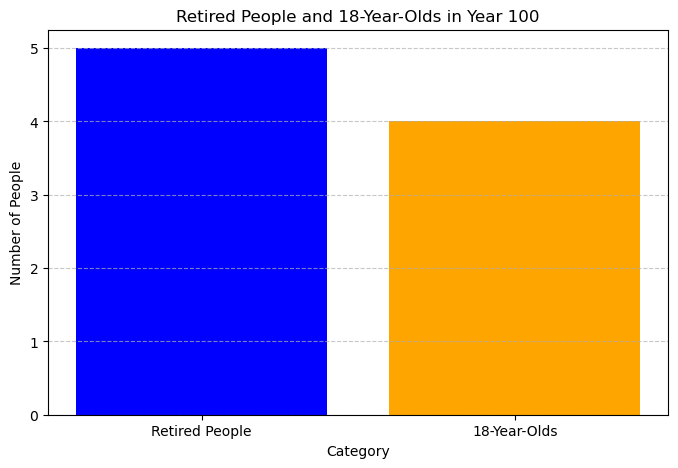

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data_all_teams.csv')

# Filter data for year 100
df_year_100 = df[df['year'] == 100]

# Count the number of retired people in year 100
num_retired = (df_year_100['age'] == 65).sum()

# Count the number of 18-year-olds in year 100
num_18_years_old = (df_year_100['age'] == 18).sum()

# Data for the bar chart
categories = ['Retired People', '18-Year-Olds']
values = [num_retired, num_18_years_old]

# Plot the data
plt.figure(figsize=(8, 5))
plt.bar(categories, values, color=['blue', 'orange'])

# Labels and title
plt.xlabel('Category')
plt.ylabel('Number of People')
plt.title('Retired People and 18-Year-Olds in Year 100')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()
